## Saturation analyses on the Lx, for whole genome

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dir_Lx = '../out/20.0909 Lx/'
recall_cutoff = 0.95
Lx_range = [25,75,100,200,300]

In [68]:
def getPct(x, model_name, cutoff=0.95):
    # get the fraction of targets with recall > cutoff
    # given as is refering to Lx
    df_results = pd.read_csv('%s/L%sonly_reg_rf_boruta/model_results.csv' % (dir_Lx, x))
    
    #genes_pass = df_results.loc[df_results.score_test>0,'target']
    #genes_pass = df_results.loc[(df_results.score_train - df_results.score_test) < 0.1,'target']
    #df_results = df_results.loc[df_results.target.isin(set(genes_pass)),:].copy()
    
    df_results = df_results.loc[df_results.model == model_name,:].copy()
    n_total = df_results.shape[0]
    n_pass = sum(df_results.corr_test_recall > cutoff)
                
    return n_total, n_pass/n_total, np.nanmean(df_results.corr_test), np.nanmean(df_results.score_test), np.nanmean(df_results.score_train)


def getStats(model_name):
    df_stats = {'Lx':[], 'recall_pct':[], 'mean_corr':[], 'mean_R2_test':[], 'mean_R2_train':[], 'n':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        n, recall_pct, mean_corr, mean_R2_test, mean_R2_train = getPct(x, model_name, recall_cutoff)
        df_stats['recall_pct'].append(recall_pct)
        df_stats['mean_corr'].append(mean_corr)
        df_stats['mean_R2_test'].append(mean_R2_test)
        df_stats['mean_R2_train'].append(mean_R2_train)
        df_stats['n'].append(n)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

#### based on reduced model top 10 feat

In [69]:
df_stats = getStats('top10feat')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.518851,0.209106,0.033735,0.399727,557
1,75,0.727106,0.302172,0.104724,0.487653,546
2,100,0.740187,0.318525,0.119651,0.507443,535
3,200,0.796545,0.360770,0.147671,0.535090,521
4,300,0.836000,0.380229,0.170815,0.554859,500


[Text(0.5, 0, 'Lx'), Text(0, 0.5, '% targets with recall > 0.95')]

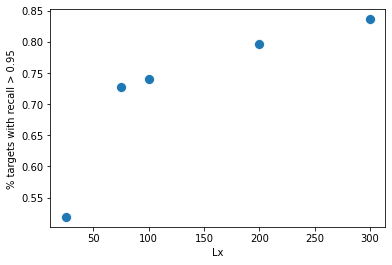

In [70]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized % targets with recall > 0.95')]

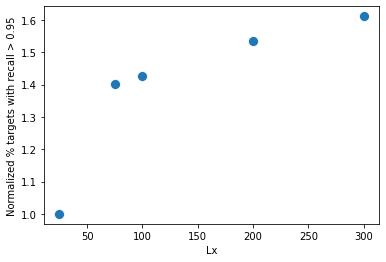

In [71]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct / df_stats.recall_pct[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized %% targets with recall > %s' % recall_cutoff)

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Mean correlation (rho)')]

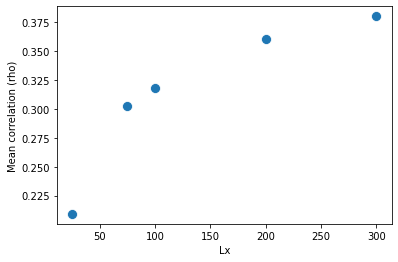

In [72]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized Mean correlation (rho)')]

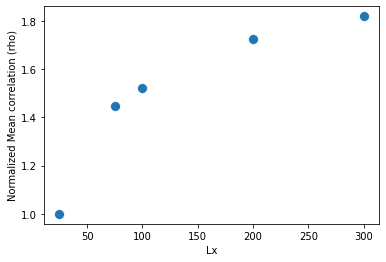

In [73]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr / df_stats.mean_corr[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized Mean correlation (rho)')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Mean R2')]

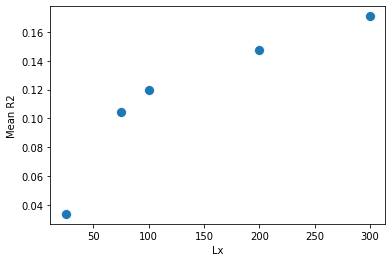

In [74]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized Median R2')]

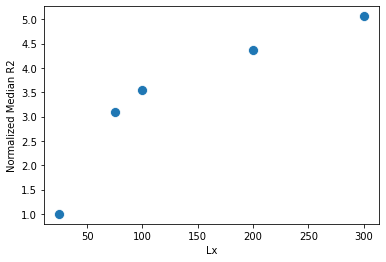

In [75]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test / df_stats.mean_R2_test[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized Median R2')